# Plotting in R with the ggplot2 package

The `ggplor2` package is another member of the `tidyverse` package collection authored by Hadley Wickham. It is one of the most used packages for plotting in R, if not *the* most used. `ggplot2` is based on a "grammar of graphics" which means that the plots are built in layers.

Let us first load `tidyverse` and set the size of plots in the notebook.

In [1]:
library(tidyverse)
options(repr.plot.width=8, repr.plot.height=5)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


We first look at a simple example of a scatter plot (of variables from the `mpg` dataset that comes with `ggplot2`). We will make the same plot with the standard plot function in R and with `ggplot2`. The code for the `ggplot2` plot is more complex, but its generic form can be used to generate all sorts of plots as well as adding on various new features.

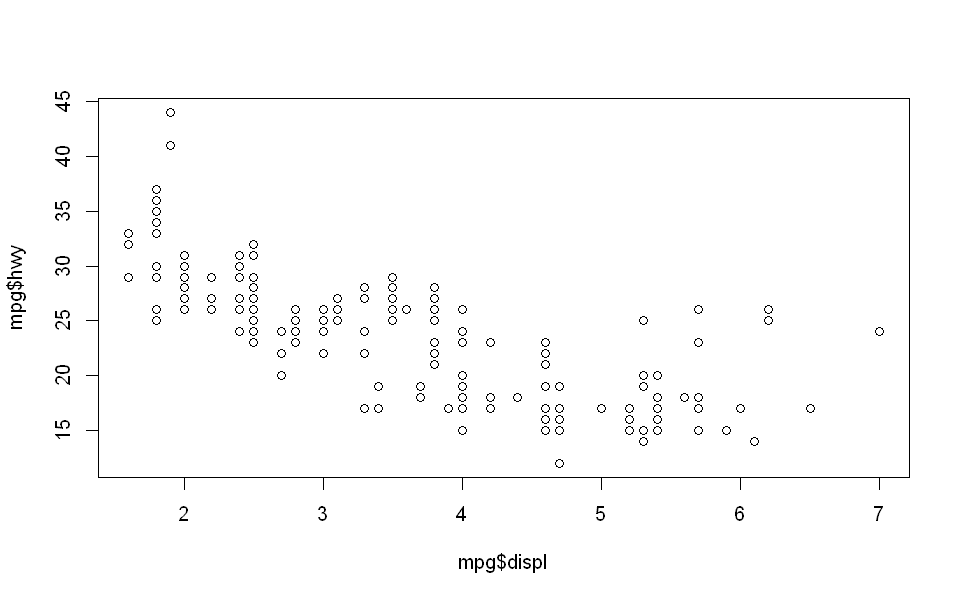

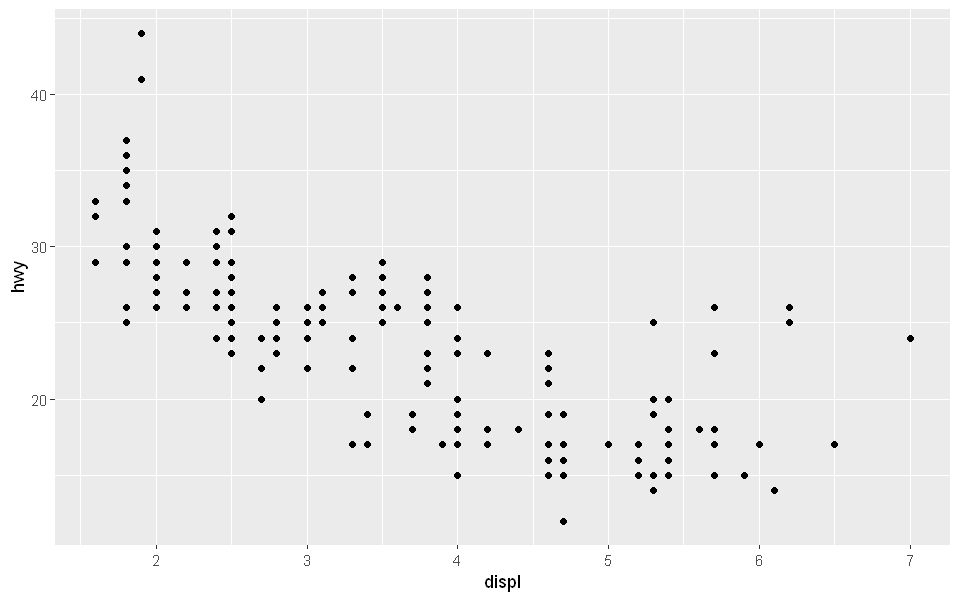

In [2]:
plot(mpg$displ, mpg$hwy)
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy))

## A generic template for plotting with ggplot2

The generic template for `ggplot2` plots looks like this:

`ggplot(data = <DATA>) + GEOM_FUNCTION(mapping = aes(<MAPPINGS>))`

The `ggplot` function takes a data frame as argument and creates an empty coordinate system that you can add layers to. The `GEOM_FUNCTION` is not an R function here but a placeholder for a specific geom function that adds additional layers to you plot. For instance, `geom_point` adds a layer of points to your plot, while `geom_line` adds a layer of lines to your plot. There are numerous other geom functions, as well.

Geom functions take a "*mapping*" as argument. It defines how variables in the data frame are mapped to *visual properties* in the plot. Note that the mapping argument is always paired with the function `aes(...)`. For instance, in the previous plot `geom_point(mapping = aes(x = speed, y = dist))` means that you want to plot points and that the variable "speed" is mapped to the x-axes and "dist" is mapped to the y-axes in the plot.

Let us return to the previous scatter plot of the variables `displ` (a car's engine size in liters) and `hwy` (a car's fuel efficiency on the highway in miles per gallon) from the `mpg `dataset and try out a line instead of points.

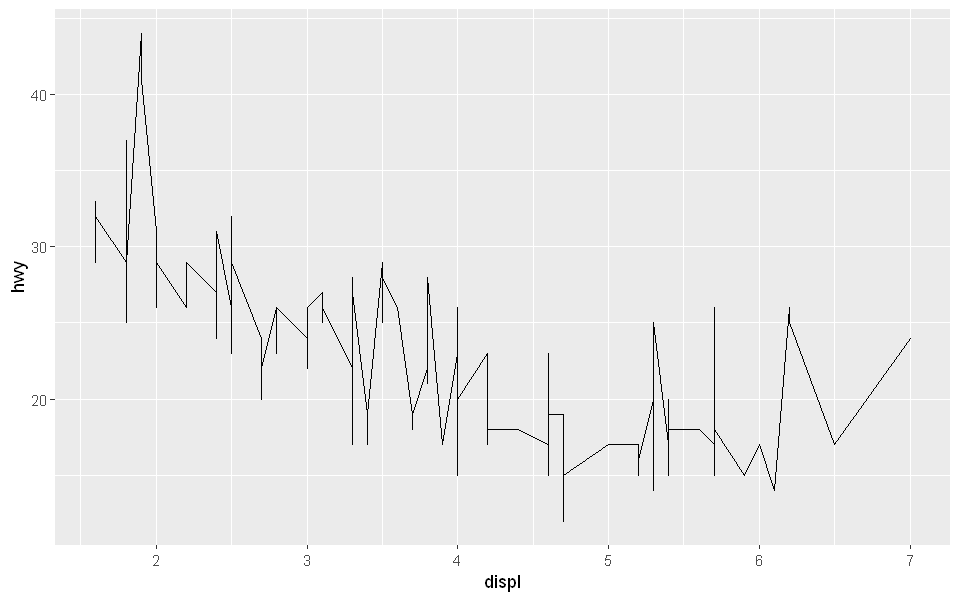

In [3]:
ggplot(data = mpg) + geom_line(mapping = aes(x = displ, y = hwy))

## Adding more mappings

We can show a third variable in a 2d-plot using other *aesthetics* than the "x" and "y". Other available aesthetics include "size", "color", and "shape". The variable `class` (from `mpg` data) can be mapped to color, for instance:

In [4]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


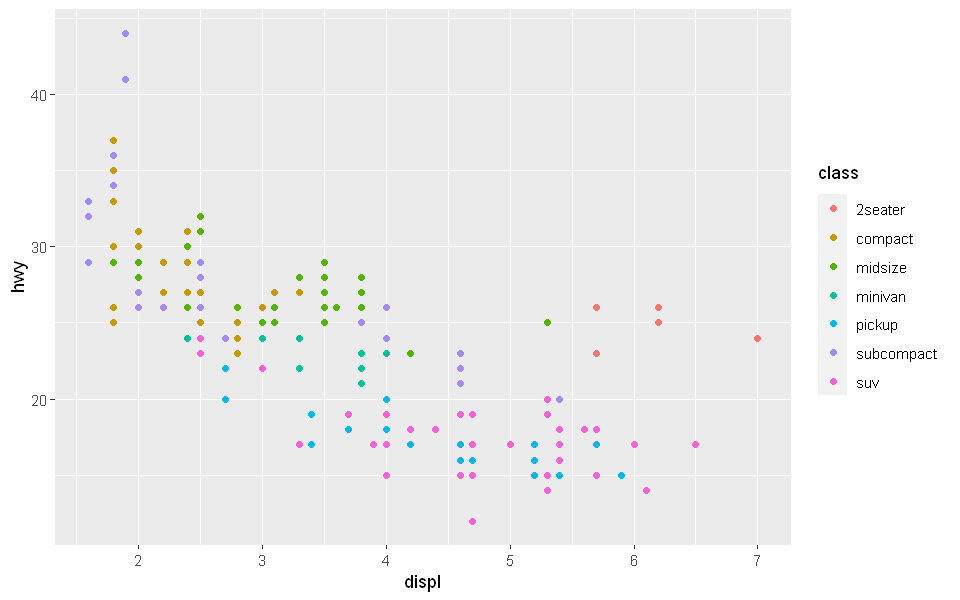

In [5]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy, color = class))

Similar we can map the variable `class` to size or shape:

Warning message:
"Using size for a discrete variable is not advised."

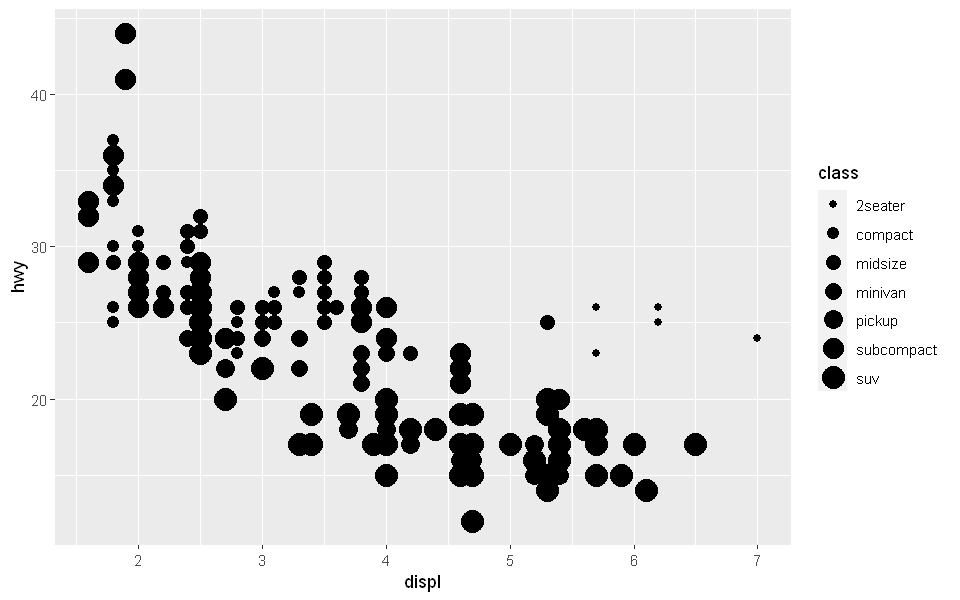

In [6]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy, size = class))

Warning message:
"The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them."Warning message:
"Removed 62 rows containing missing values (geom_point)."

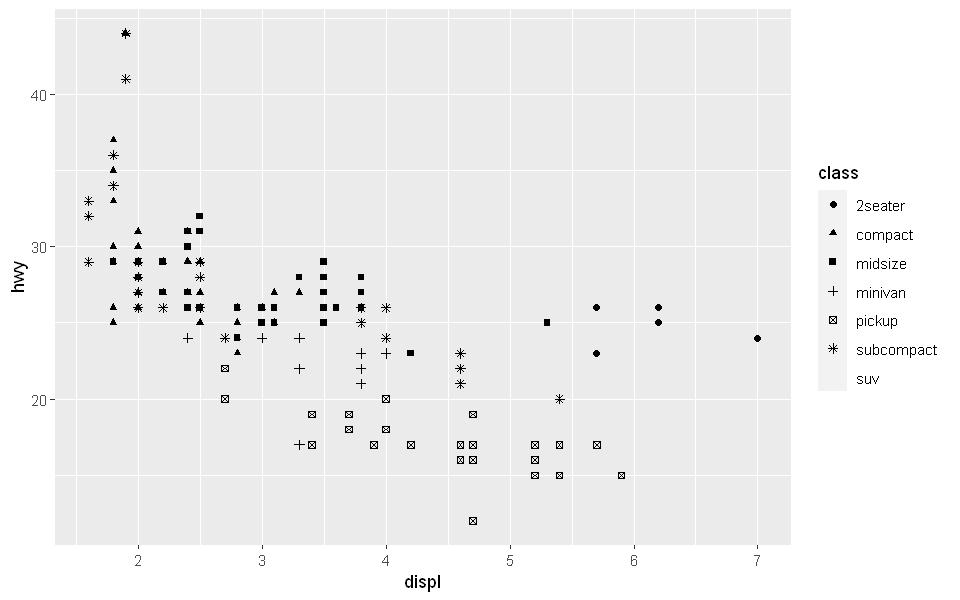

In [7]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy, shape = class))

Clearly the size aesthetics was not a good choice here as it is hard to distinguish the different sizes. The variable `class` that we tried to map to size is a categorical variable, which means that shape or color is usually better than size, while size can be useful when mapping a numeric variable.

Also note the warning message for the plot mapping `class` to shape. The variable `class` have 7 distinct values (     'compact' 'midsize' 'suv' '2seater' 'minivan' 'pickup' 'subcompact'), but there are only 6 different shapes to map to. Thus the points for the last value ('suv') do not appear in the plot.

For clarity we can also use multiple aesthetics for a single variable such as the `class` variable. We can use color and size, for instance:

Warning message:
"Using size for a discrete variable is not advised."

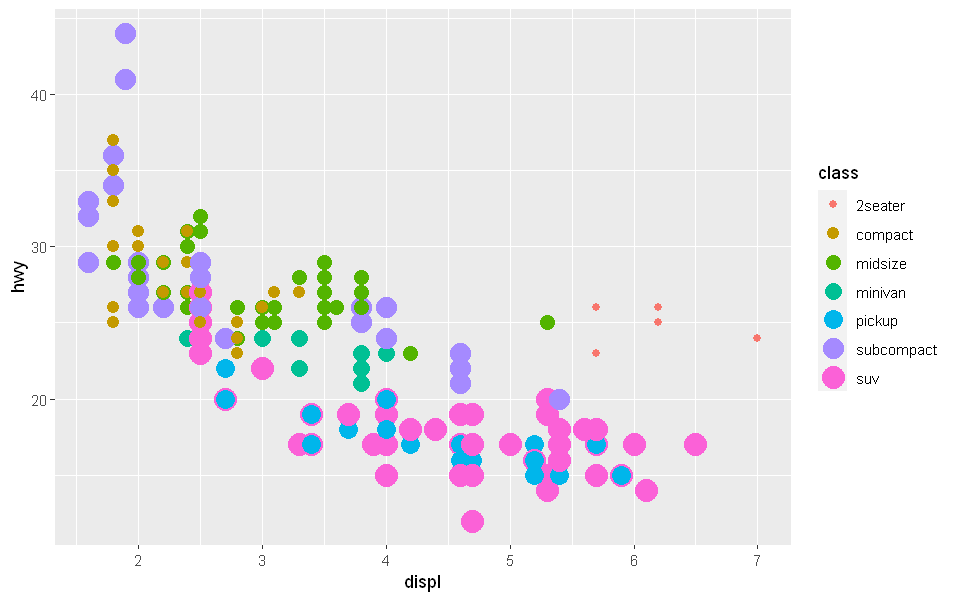

In [8]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy, color = class, size = class))

## Setting aesthetic properties manually

We can also set aesthetic properties manually, such as the colors of all points or the shape of all points:

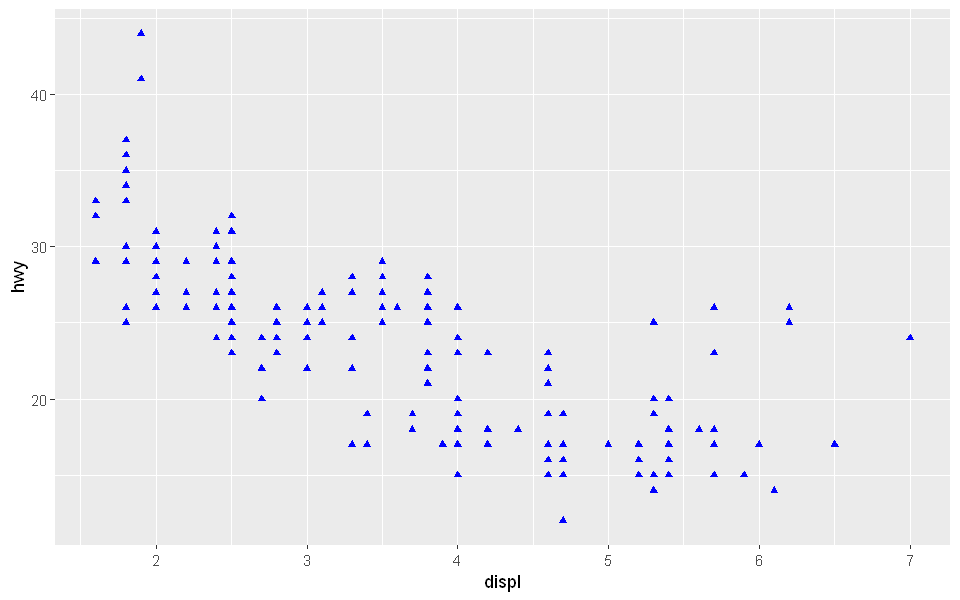

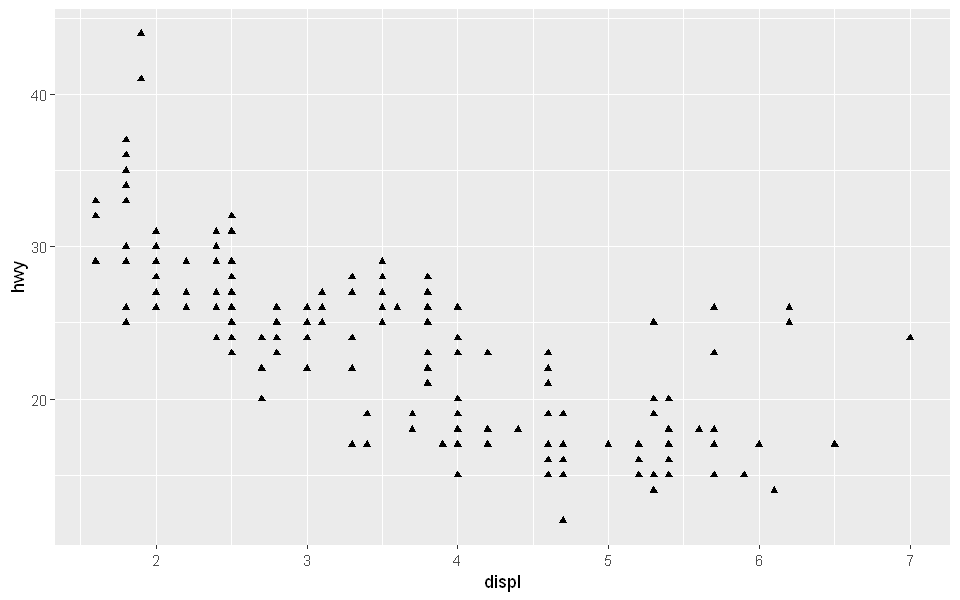

In [9]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy), color = "blue", shape = 17)
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy), shape = 17)

We can also set the transparency of points. The argument for transparency is called `alpha`. A value of 0 means completely transparent and a value of 1 means non-transparent.

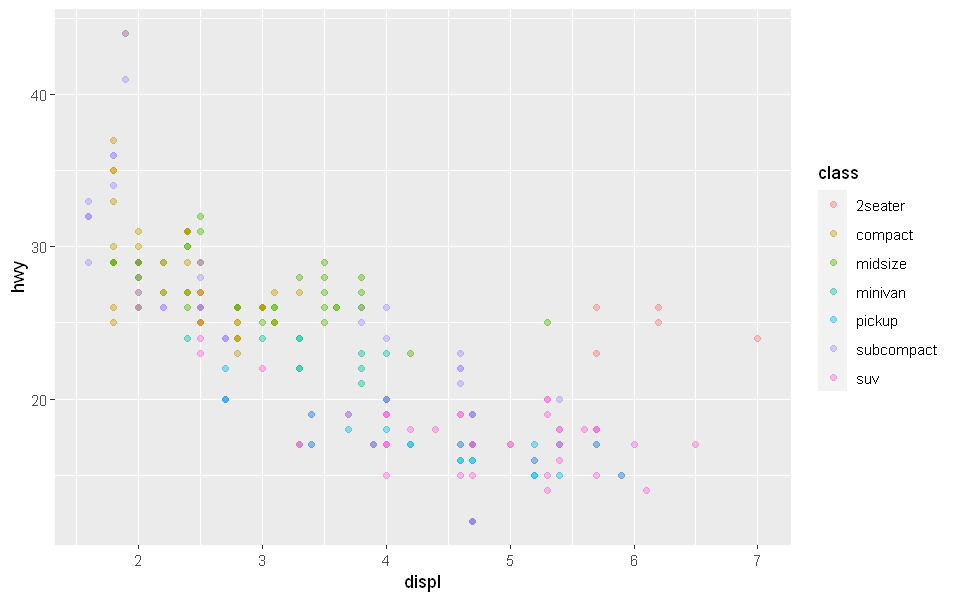

In [10]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy, color = class), alpha = 0.4)

Note that, when we do these things, the argument are outside the `aes(...)`. This is because we are not mapping data (from a variable) to an aesthetics, we are setting a property of all data points.

## Facet plots

Instead of mapping a categorical variable (such as `class`) to an aesthetics such as color, we can also make a plot for each value of the variable using `facet_wrap()`:

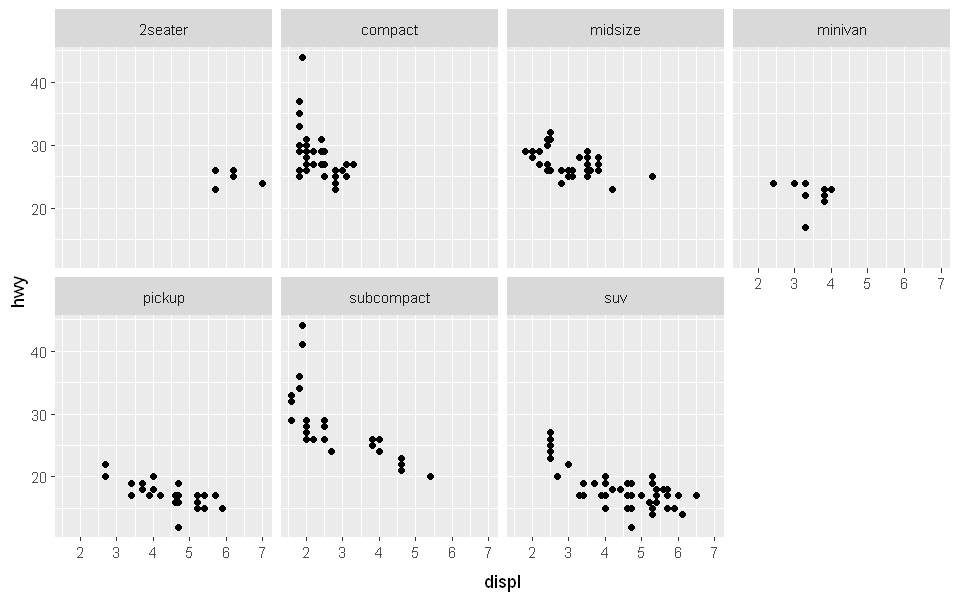

In [11]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy)) + facet_wrap(~ class, nrow = 2)

With the `facet_grid` function, you can make a facet plot where you split the plot based on two categorical variable such that one variable occurs along the horizontal axis and one along the vertical axis.

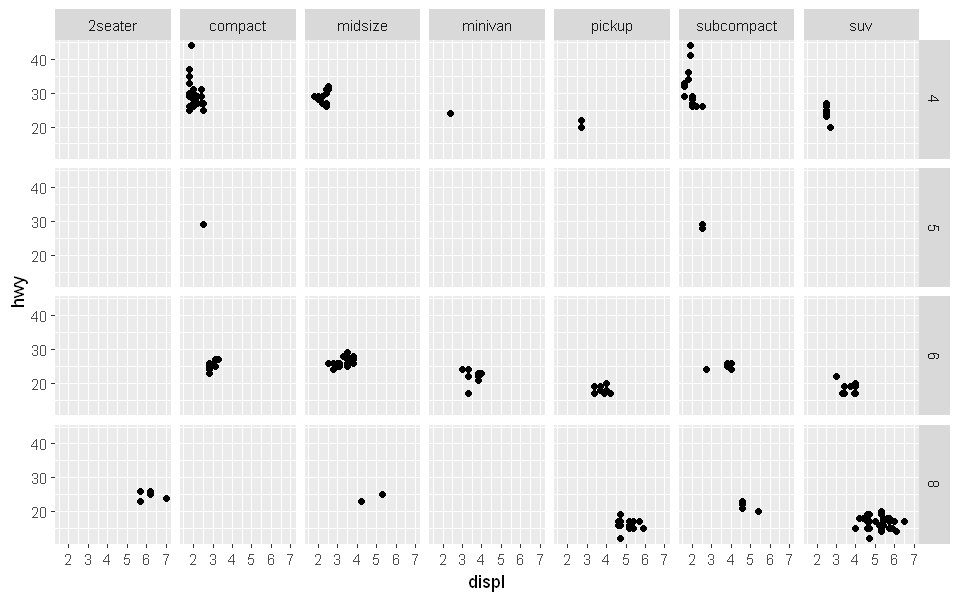

In [12]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy)) + facet_grid(cyl ~ class)

Note how these plots easily becomes hard to read or not really valuable, so think before using them.

## Other "geoms"

We have only looked at the point geom so far, but there are many other geoms. For instance the "line geom":

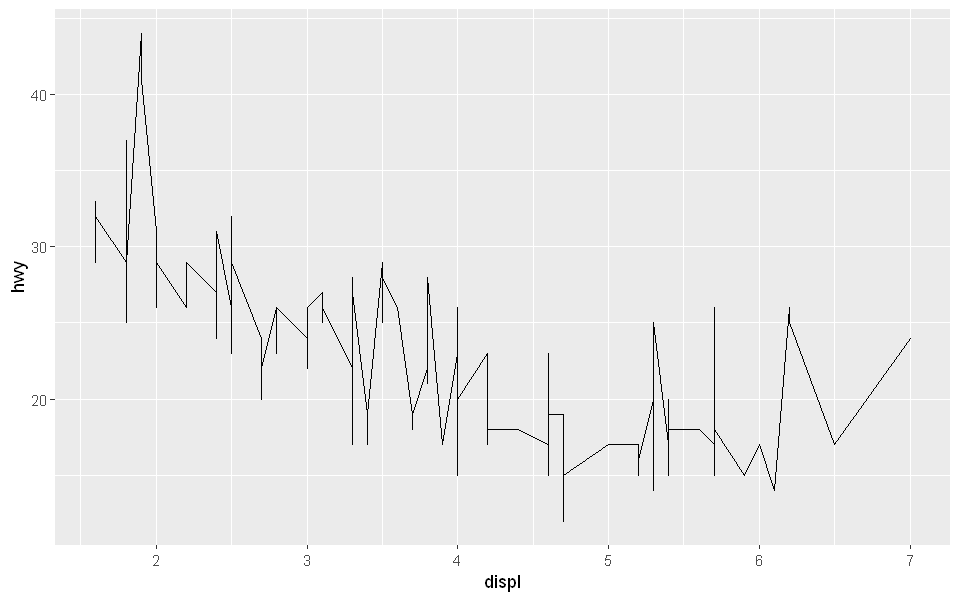

In [13]:
ggplot(data = mpg) + geom_line(mapping = aes(x = displ, y = hwy))

While the point geom and line geom both plot data as is, there are also geoms that tries to fit particular shapes (or models) to the data. One such is the `geom_smooth` that tries to fit a smooth line to all the points. If you want the smooth line to be linear you can specify this using the method argument.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


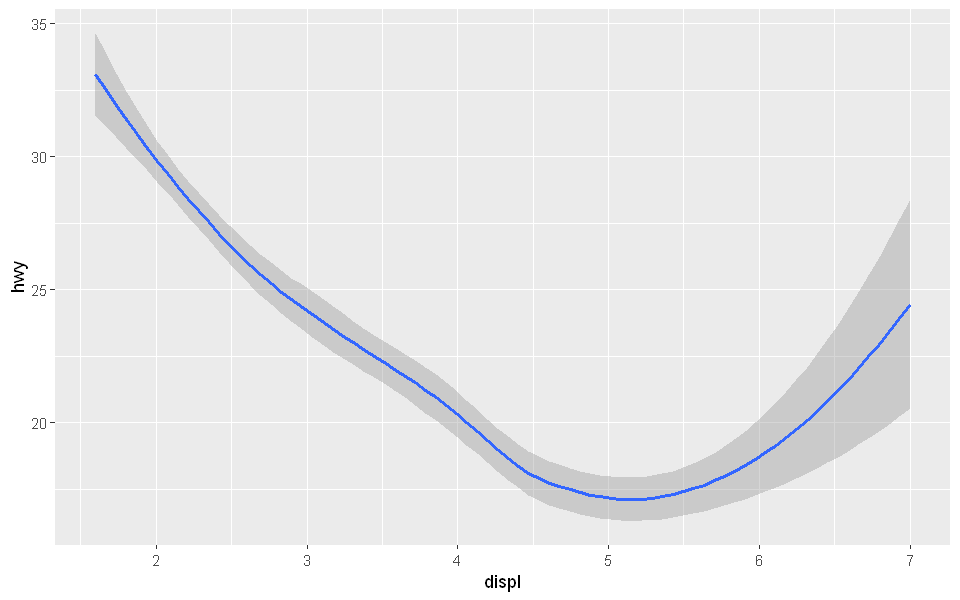

In [14]:
ggplot(data = mpg) + geom_smooth(mapping = aes(x = displ, y = hwy))

`geom_smooth()` using formula 'y ~ x'


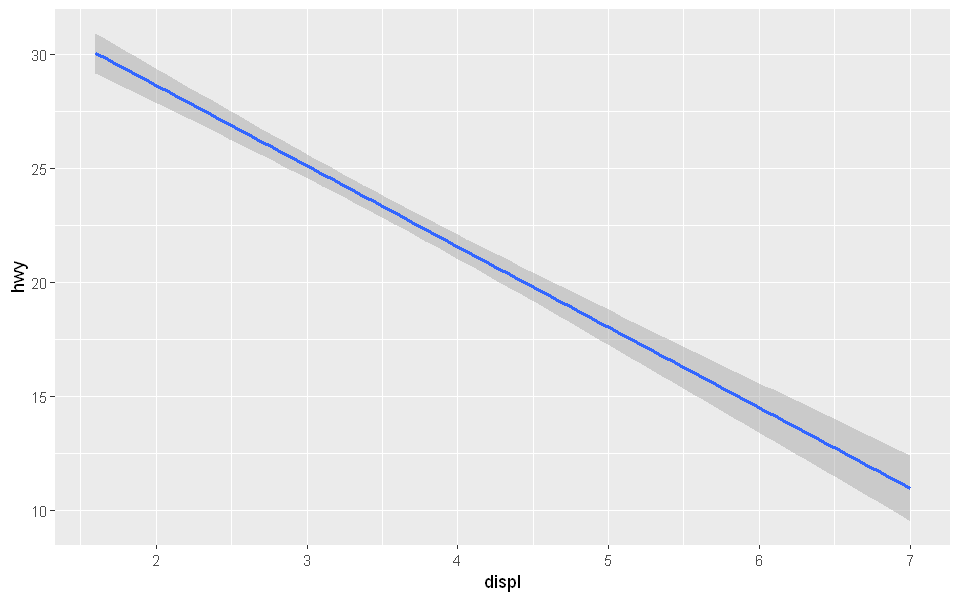

In [15]:
ggplot(data = mpg) + geom_smooth(mapping = aes(x = displ, y = hwy), method = "lm")

We can also make a line for each value of the `class` variable by mapping to an aesthetic:

`geom_smooth()` using formula 'y ~ x'


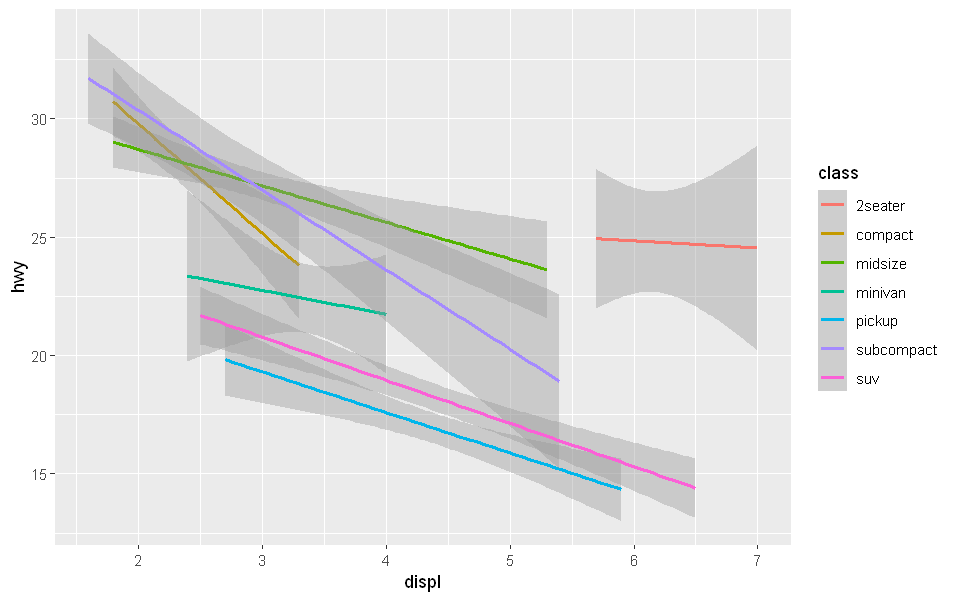

In [16]:
ggplot(data = mpg) +geom_smooth(mapping = aes(x = displ, y = hwy, color = class), method = "lm")

We can also plot both the points and a line at the same time by simply adding both geoms. This a good example of how the layered construction of plots can be really useful.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


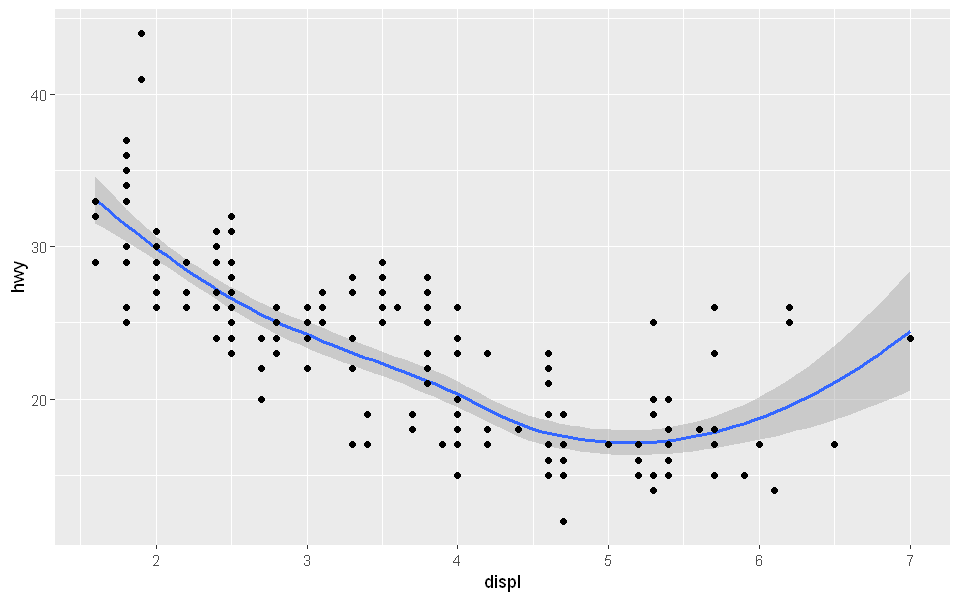

In [17]:
ggplot(data = mpg) + geom_smooth(mapping = aes(x = displ, y = hwy)) + geom_point(mapping = aes(x = displ, y = hwy))

## Other types of plots

We can also make histogram plots with `ggplot2`. Here, instead of setting the number of bins, we can set the width of the bins.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


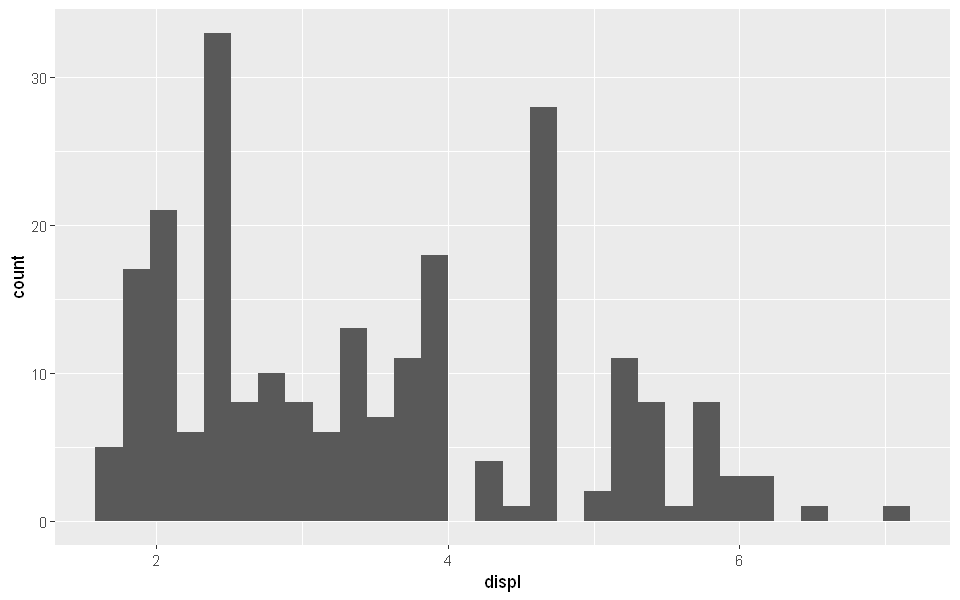

In [18]:
ggplot(data = mpg) + geom_histogram(mapping = aes(x = displ))

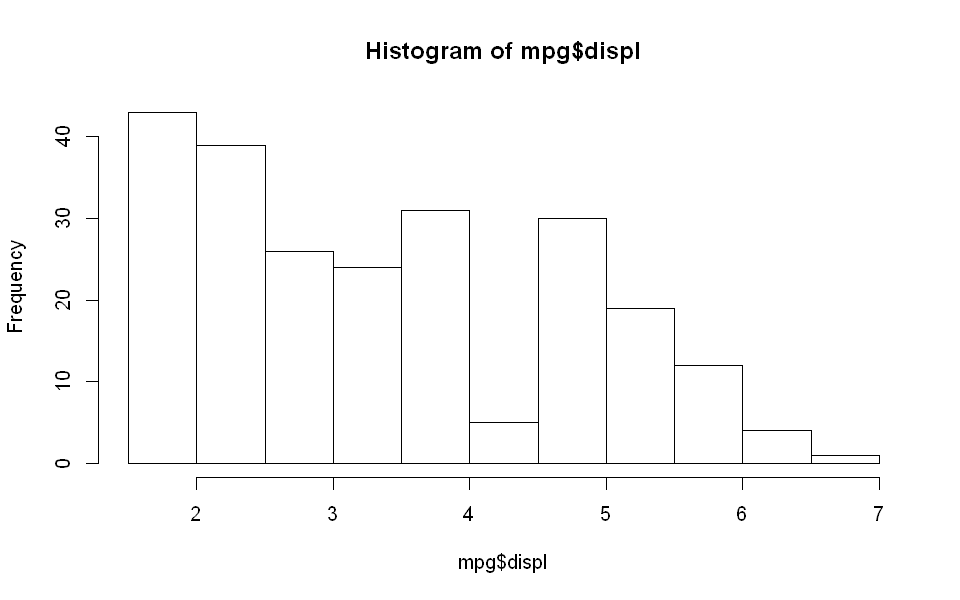

In [19]:
hist(mpg$displ)

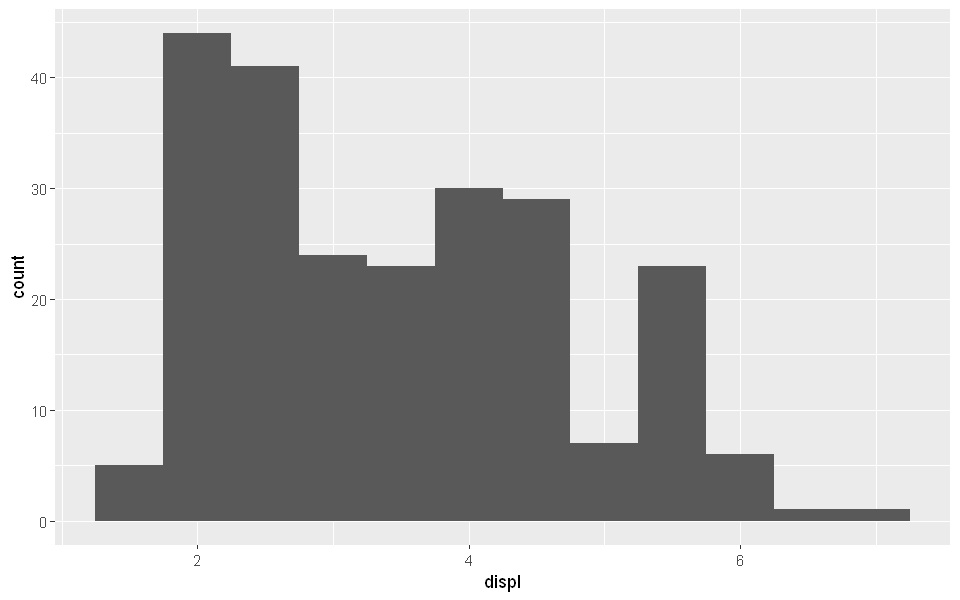

In [20]:
ggplot(data = mpg) + geom_histogram(mapping = aes(x = displ), binwidth = 0.5)

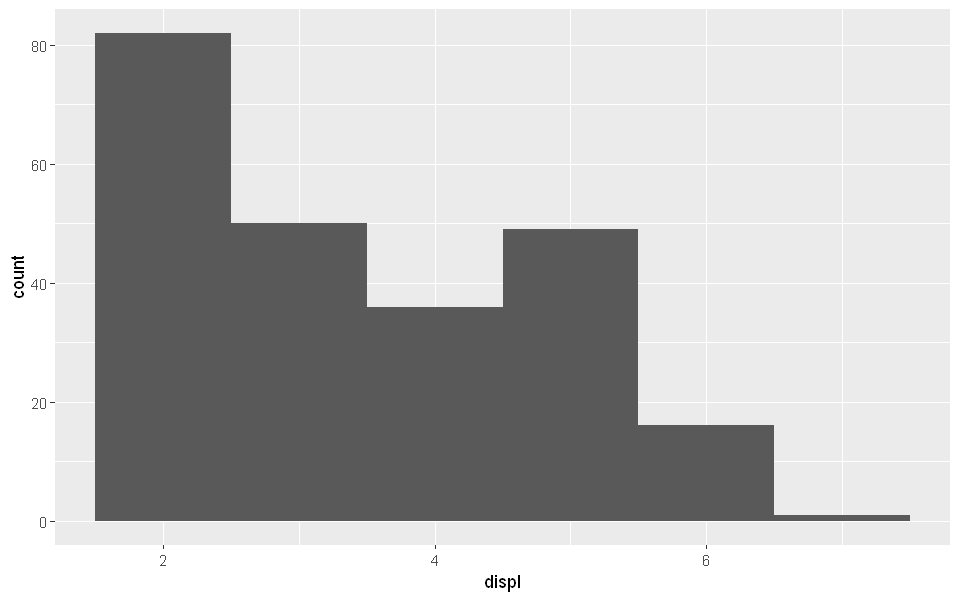

In [21]:
ggplot(data = mpg) + geom_histogram(mapping = aes(x = displ), binwidth = 1)

Another type of plot we can make is boxplots. In `ggplot2` these are done in the following way:

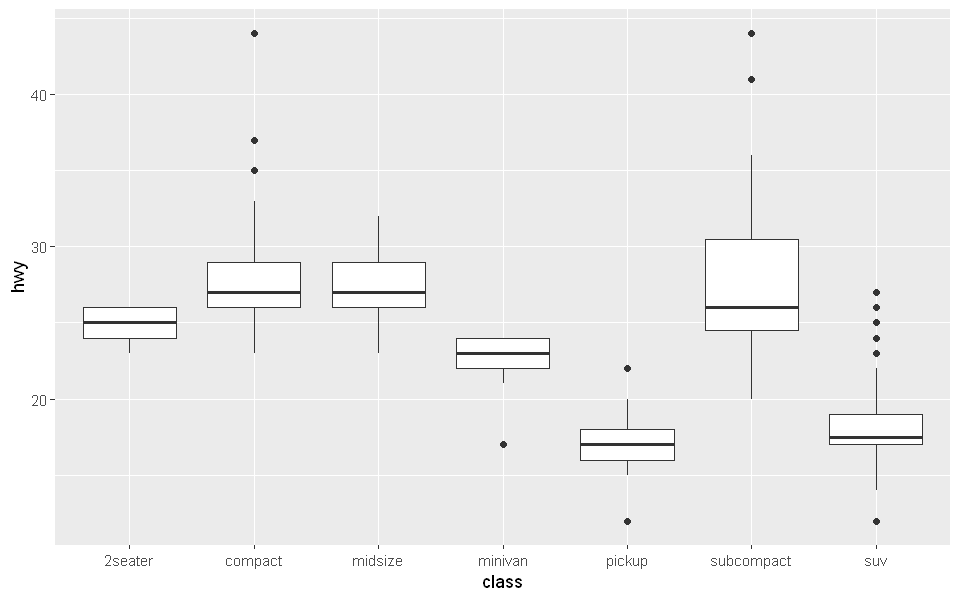

In [22]:
ggplot(data = mpg) + geom_boxplot(mapping = aes(x = class, y = hwy))

We can flipping the x and y axes in boxplots in the following way:

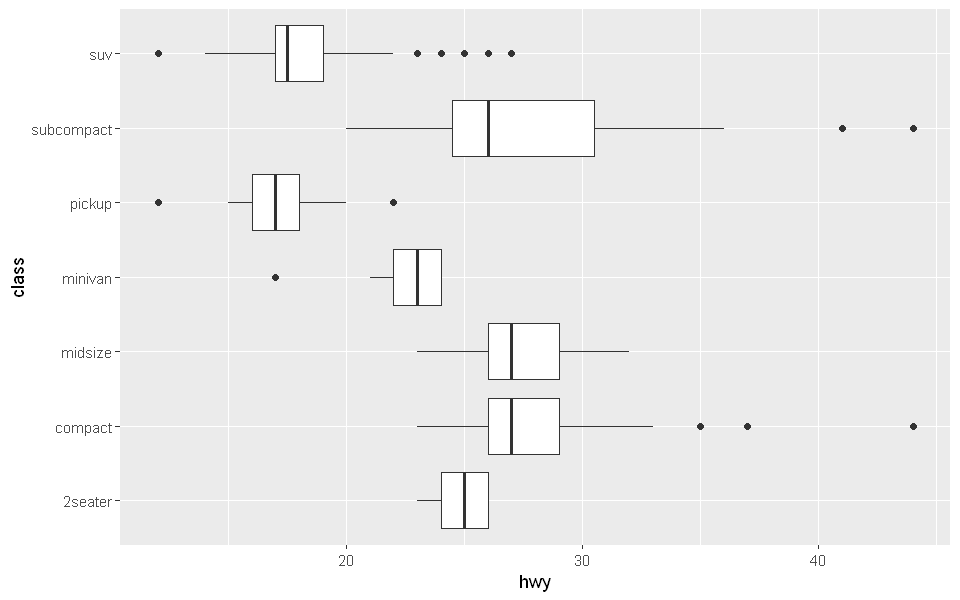

In [23]:
ggplot(data = mpg) + geom_boxplot(mapping = aes(x = class, y = hwy)) + coord_flip()

We can also make bar plots:

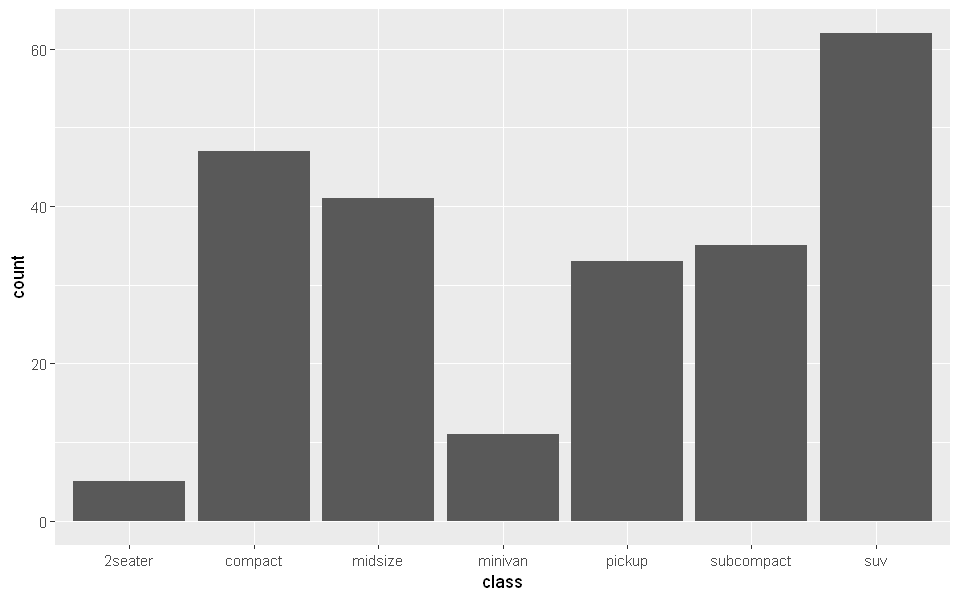

In [24]:
ggplot(data = mpg) + geom_bar(mapping = aes(x = class))

And flip the bars:

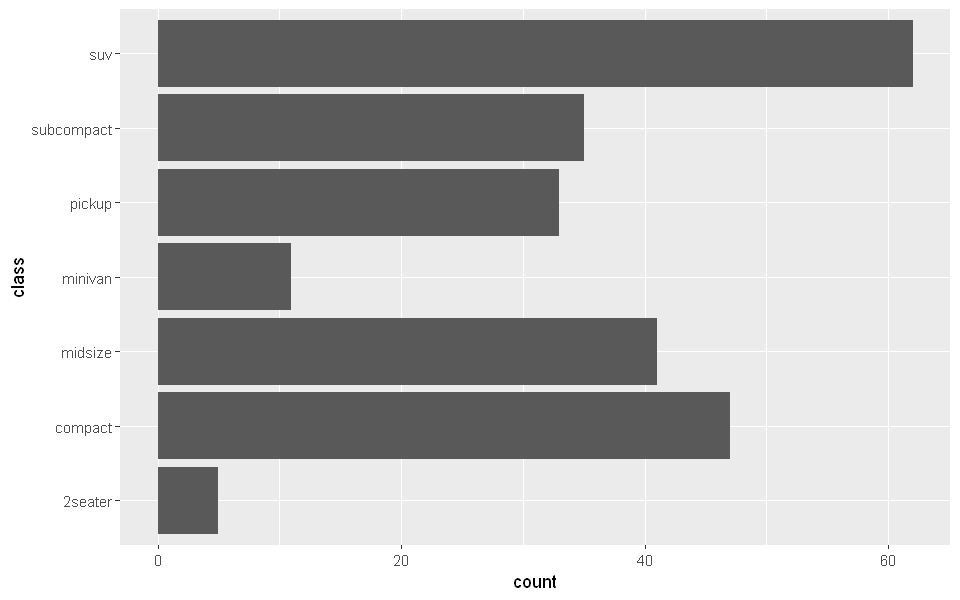

In [25]:
ggplot(data = mpg) + geom_bar(mapping = aes(x = class)) + coord_flip()

## Adding titles and other labels

Adding and adjusting titles and labels are also easily done with `ggplot2`, for instance:

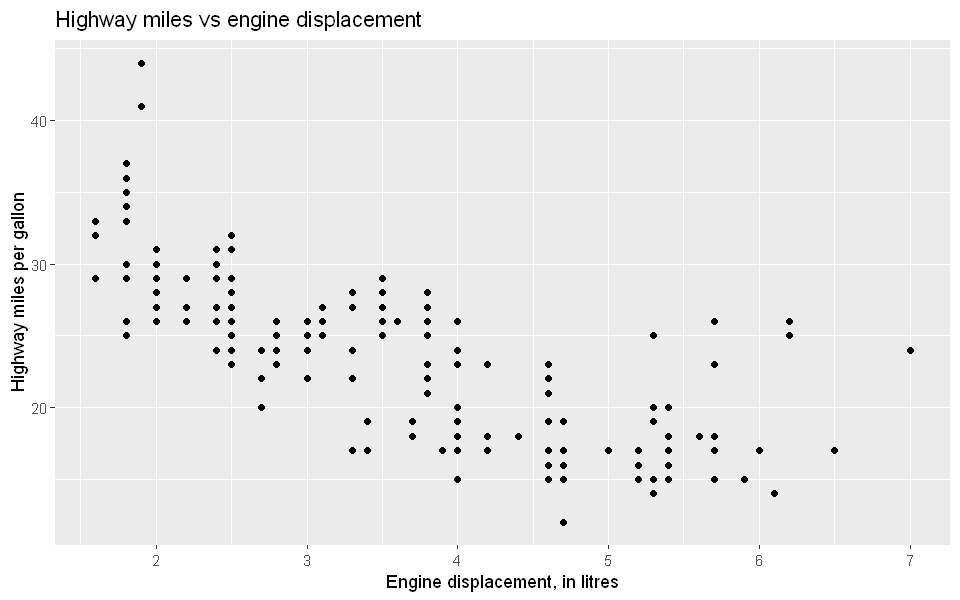

In [26]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  ggtitle("Highway miles vs engine displacement") + 
  xlab("Engine displacement, in litres") +
  ylab("Highway miles per gallon")

Axis can also be scaled easily:

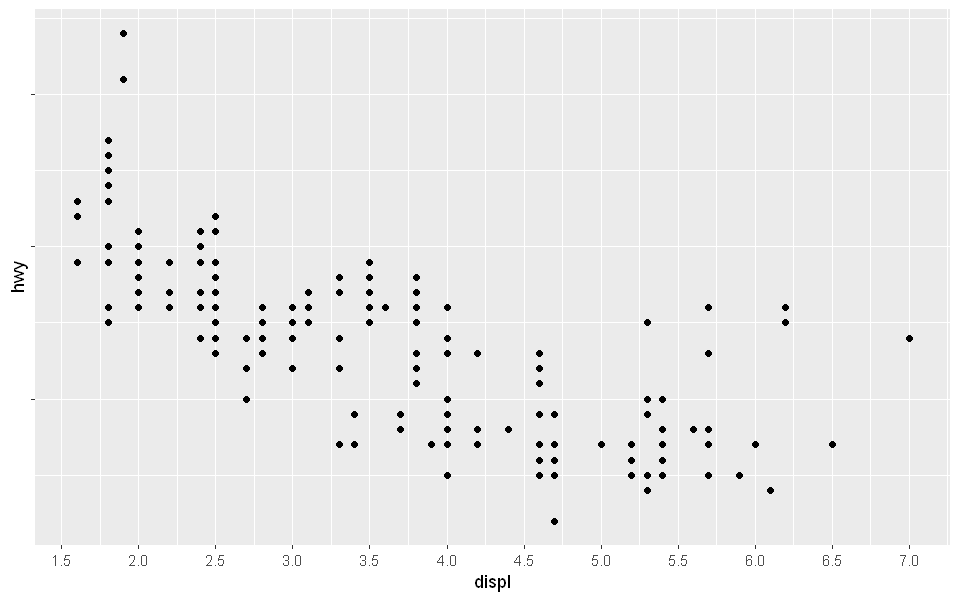

In [27]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  scale_y_continuous(labels = NULL) +
  scale_x_continuous(breaks = seq(from = 1, to = 8, by = 0.5))

And legends moved:

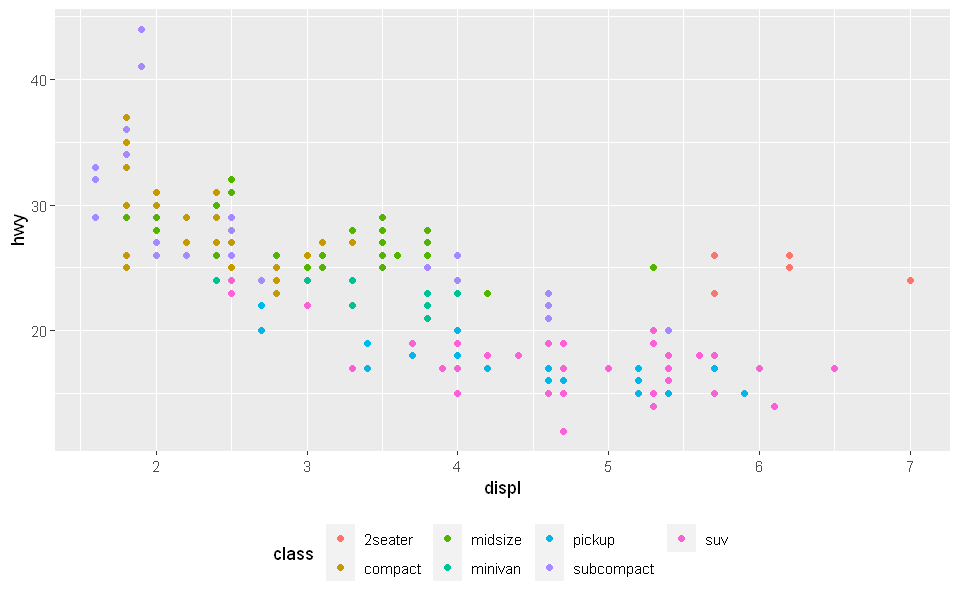

In [28]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, color = class)) +
  theme(legend.position = "bottom")

Finally, we can also change the entire theme, or define our own.

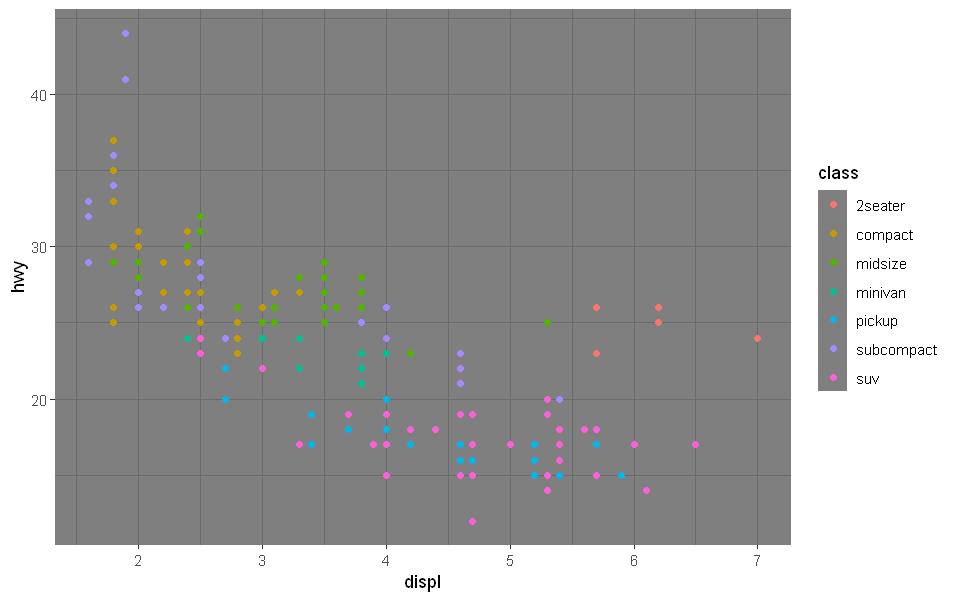

In [29]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, color = class)) +
  theme_dark()

## Zooming in plots

We can also zoom in and out in plots by changing the axis limits using the `coord_cartesian` function:

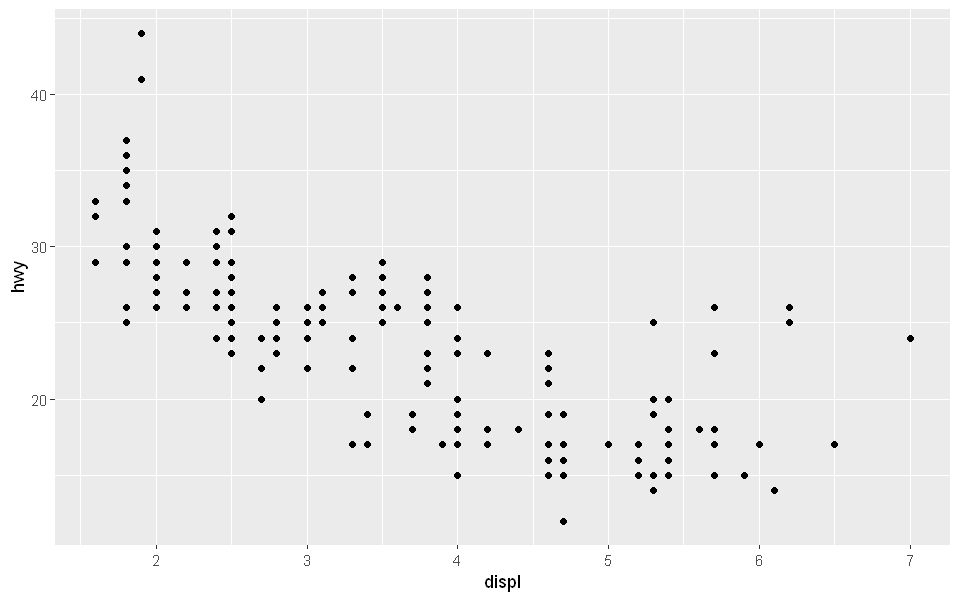

In [30]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy))

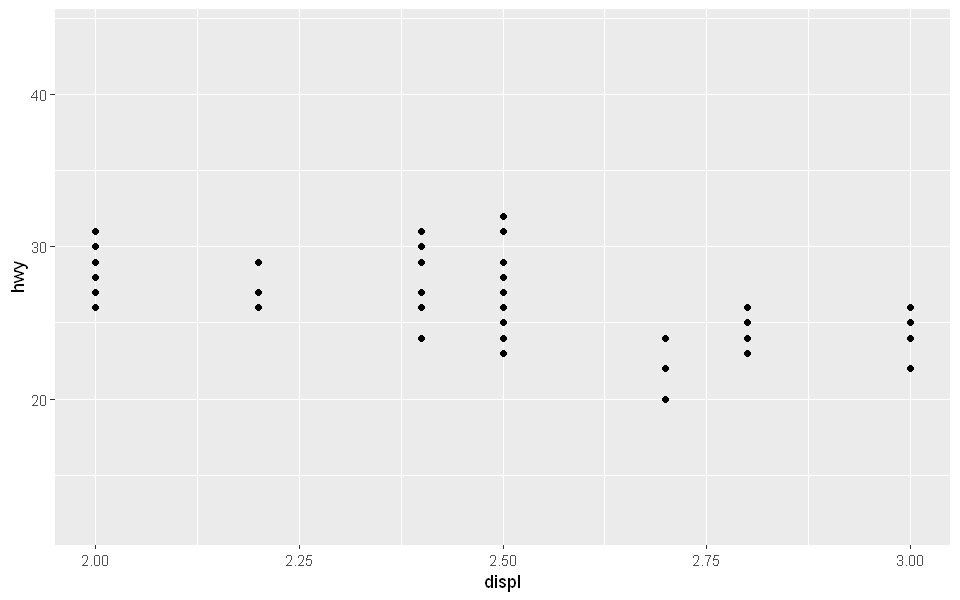

In [31]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  coord_cartesian(xlim = c(2, 3))

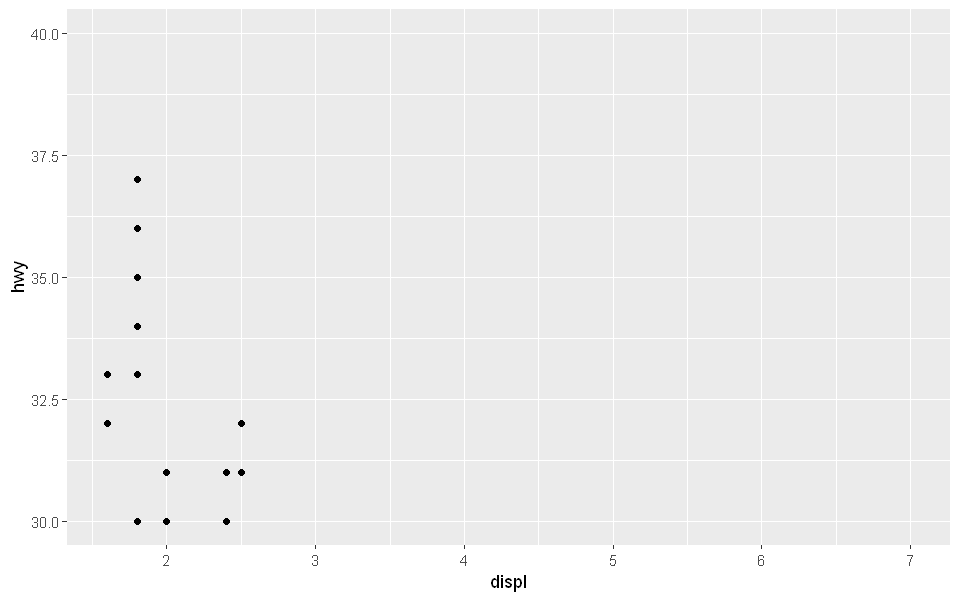

In [32]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  coord_cartesian(ylim = c(30, 40))

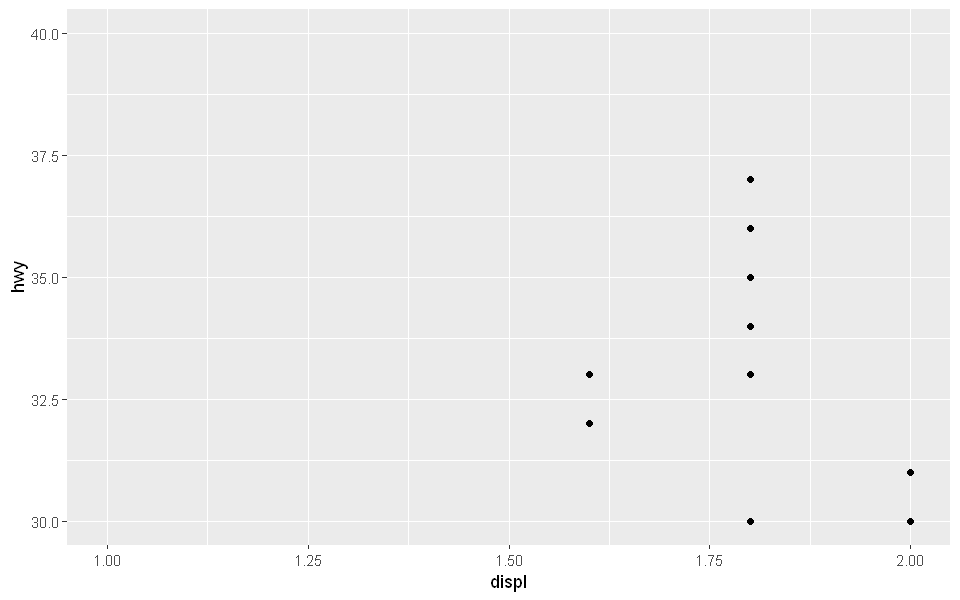

In [33]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  coord_cartesian(xlim = c(1, 2), ylim = c(30, 40)) 

## Additional resources

More examples of plotting with `ggplot2`can be found in chapter 3 and 28 of "[R for Data Science](http://r4ds.had.co.nz/)". There is also a very useful "Data Visualization with ggplot2" cheatsheet, or just googling "r ggplot2 ..." will give you a lot of examples and more information.

### *Exercise*

Recreate the plots from the "*4.2 Exploratory Data Analysis.ipynb*" notebook as `ggplot2` plots